<h1><center>Cluster Segmentation of Credit Card Customers</center></h1>

<h2>Part1. Data Preparation</h2>

<h3>1.1 Import Libraries</h3><br>
<b>Data Analysis</b>
<ul>
    <li>numpy</li>
    <li>pandas</li>
    <li>matplotlib</li>
    <li>seaborn</li>
</ul>
<b>K-Means</b>
<ul>
    <li>KMeans</li>
    <li>StandardScaler</li>
</ul>

In [1]:
#Data Analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#K-Means
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

<h3>1.2 Load & Check Data</h3><br>

<h4>Load Data</h4>

In [19]:
df_raw = pd.read_csv('data.csv')
df_raw.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<h4>Check Basic Dataset Information</h4>

In [6]:
n_col = df_raw.shape[0]
df_raw.shape

(8950, 18)

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [11]:
display(df_raw.describe().iloc[:,:6])
display(df_raw.describe().iloc[:,7:11])
display(df_raw.describe().iloc[:,12:18])

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760


,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX
count,8950.000000,8950.000000,8950.000000,8950.000000
mean,0.202458,0.364437,0.135144,3.248827
std,0.298336,0.397448,0.200121,6.824647
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.083333,0.166667,0.000000,0.000000
75%,0.300000,0.750000,0.222222,4.000000
max,1.000000,1.000000,1.500000,123.000000


,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,50.000000,0.000000,0.019163,0.000000,6.000000
25%,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,30000.000000,50721.483360,76406.207520,1.000000,12.000000


<h3>1.3 Data Dictionary</h3>
<ul>
    <li><b>CUSTID</b> : Identification of Credit Card holder (Categorical)</li>
    <li><b>BALANCE</b> : Balance amount left in their account to make purchases</li>
    <li><b>BALANCE_FREQUENCY</b> : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)</li>
    <li><b>PURCHASES</b> : Amount of purchases made from account</li>
    <li><b>ONEOFF_PURCHASES</b> : Maximum purchase amount done in one-go</li>
    <li><b>INSTALLMENTS_PURCHASES</b> : Amount of purchase done in installment</li>
    <li><b>CASH_ADVANCE</b> : Cash in advance given by the user</li>
    <li><b>PURCHASES_FREQUENCY</b> : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)</li>
    <li><b>ONEOFF_PURCHASES_FREQUENCY</b> : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)</li>
    <li><b>PURCHASES_INSTALLMENTS_FREQUENCY</b> : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)</li>
    <li><b>CASH_ADVANCE_FREQUENCY</b> : How frequently the cash in advance being paid</li>
    <li><b>CASH_ADVANCE_TRX</b> : Number of Transactions made with "Cash in Advanced"</li>
    <li><b>PURCHASES_TRX</b> : Numbe of purchase transactions made</li>
    <li><b>CREDIT_LIMIT</b> : Limit of Credit Card for user</li>
    <li><b>PAYMENTS</b> : Amount of Payment done by user</li>
    <li><b>MINIMUM_PAYMENTS</b> : Minimum amount of payments made by user</li>
    <li><b>PRC_FULL_PAYMENT</b> : Percent of full payment paid by user</li>
    <li><b>TENURE</b> : Tenure of credit card service for user</li>
</ul>


<h3>1.4 Data Selection</h3>
<br>
The following columns are selected for K-Means cluster analysis.<br><br>
<b>Balance</b>
<ul>
    <li>BALANCE</li>
    <li>BALANCE_FREQUENCY: related to purchase frequency</li>
</ul>
<b>Purchase</b>
<ul>
    <li>ONEOFF_PURCHASES</li>
    <li>INSTALLMENTS_PURCHASES</li>
    <li>ONEOFF_PURCHASES_FREQUENCY</li>
    <li>PURCHASES_INSTALLMENTS_FREQUENCY</li>
    <li>CASH_ADVANCE</li>
    <li>CASH_ADVANCE_FREQUENCY</li>
    <li>CASH_ADVANCE_TRX</li>
    <li>PURCHASES_TRX</li>
</ul>

<b>Credit</b>
<ul>
    <li>CREDIT_LIMIT</li>
    <li>PAYMENTS</li>
    <li>MINIMUM_PAYMENTS</li>
    <li>PRC_FULL_PAYMENT: related to the customer's ability to pay all balance</li>
</ul>
<b>Customer Related</b>
<ul>
    <li>TENURE</li>
</ul>

<b>Notes:</b>

In [35]:
check_purchase = df_raw.PURCHASES == df_raw.ONEOFF_PURCHASES + df_raw.INSTALLMENTS_PURCHASES
print('There are ',round((check_purchase.sum()/n_col * 100),2),\
      '% rows in which PURCHASE is equal to the sum of ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES.',sep='')

There are 94.5% rows in which PURCHASE is equal to the sum of ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES.


Thereore, PURCHASES can be roughly represented by ONEOFF_PURCHASES and INSTALLMENTS_PURCHASES.<br>
Therefore, this column can be omitted.

In [41]:
check_purchase_freq = np.logical_or((df_raw.PURCHASES_FREQUENCY == df_raw.ONEOFF_PURCHASES_FREQUENCY),\
                                    (df_raw.PURCHASES_FREQUENCY == df_raw.PURCHASES_INSTALLMENTS_FREQUENCY))
print('There are ',round((check_purchase_freq.sum()/n_col * 100),2),\
      '% rows in which PURCHASE_FREQUENCY is either equal to ONEOFF_PURCHASES_FREQUENCY or equal to PURCHASES_INSTALLMENTS_FREQUENCY.'\
      ,sep='')

There are 74.03% rows in which PURCHASE_FREQUENCY is either equal to ONEOFF_PURCHASES_FREQUENCY or equal to PURCHASES_INSTALLMENTS_FREQUENCY.


Similarly, PURCHASES_FREQUENCY can be roughly represented by ONEOFF_PURCHASES_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY.<br>
Therefore, PURCHASES_FREQUENCY can be omitted as well.

<b>Notes:</b>

In [13]:
cols = ['BALANCE','BALANCE_FREQUENCY',
        'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',
        'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','PURCHASES_TRX',
        'CASH_ADVANCE','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX',
        'CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT',
        'TENURE']

In [14]:
df = df_raw[cols]

<h3>1.5 Data Quality Check</h3><br>
Check for:
<ol>
    <li>Percent of missing values</li>
    <li>Percent of unique values</li>
    <li>Data types</li>
    <li>Numeric distribution skewness</li>
</ol>

<h4>Check Missing Values</h4>

In [16]:
for col in df.columns:
    null_p = df[col].isnull().sum()/n_col*100
    print('The column ',col,' is ',round(null_p,1),'% null.',sep='')
print('-'*50)
print(df.isnull().sum())

The column BALANCE is 0.0% null.
The column BALANCE_FREQUENCY is 0.0% null.
The column ONEOFF_PURCHASES is 0.0% null.
The column INSTALLMENTS_PURCHASES is 0.0% null.
The column ONEOFF_PURCHASES_FREQUENCY is 0.0% null.
The column PURCHASES_INSTALLMENTS_FREQUENCY is 0.0% null.
The column PURCHASES_TRX is 0.0% null.
The column CASH_ADVANCE is 0.0% null.
The column CASH_ADVANCE_FREQUENCY is 0.0% null.
The column CASH_ADVANCE_TRX is 0.0% null.
The column CREDIT_LIMIT is 0.0% null.
The column PAYMENTS is 0.0% null.
The column MINIMUM_PAYMENTS is 3.5% null.
The column PRC_FULL_PAYMENT is 0.0% null.
The column TENURE is 0.0% null.
--------------------------------------------------
BALANCE                               0
BALANCE_FREQUENCY                     0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
PURCHASES_TRX                         0
CASH_ADVANCE                          

Only the column MINIMUM_PAYMENTS has a noticable amount of missing values.

Printing out the number of null entries in each column verifies this.

<h4>Check Number of Unique Values</h4>

check duplicates for primary key(s)

In [98]:
n_col = df.shape[0]
for col in df.columns:
    unique_p = df[col].nunique()/n_col*100
    print('The column ',col,' is ',round(unique_p,1),'% unique.',sep='')

The column BALANCE is 99.1% unique.
The column BALANCE_FREQUENCY is 0.5% unique.
The column ONEOFF_PURCHASES is 44.8% unique.
The column INSTALLMENTS_PURCHASES is 49.7% unique.
The column ONEOFF_PURCHASES_FREQUENCY is 0.5% unique.
The column PURCHASES_INSTALLMENTS_FREQUENCY is 0.5% unique.
The column PURCHASES_TRX is 1.9% unique.
The column CASH_ADVANCE is 48.3% unique.
The column CASH_ADVANCE_FREQUENCY is 0.6% unique.
The column CASH_ADVANCE_TRX is 0.7% unique.
The column CREDIT_LIMIT is 2.3% unique.
The column PAYMENTS is 97.3% unique.
The column MINIMUM_PAYMENTS is 96.5% unique.
The column PRC_FULL_PAYMENT is 0.5% unique.
The column TENURE is 0.1% unique.


As expected, the columns that have monetary values are mostly unique.

<h4>Check Data Type</h4>

In [99]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   ONEOFF_PURCHASES                  8950 non-null   float64
 3   INSTALLMENTS_PURCHASES            8950 non-null   float64
 4   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 5   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 6   PURCHASES_TRX                     8950 non-null   int64  
 7   CASH_ADVANCE                      8950 non-null   float64
 8   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 9   CASH_ADVANCE_TRX                  8950 non-null   int64  
 10  CREDIT_LIMIT                      8949 non-null   float64
 11  PAYMENTS                          8950 non-null   float64
 12  MINIMU

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,0.00,95.4,0.000000,0.083333,2,0.000000,0.000000,0,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.0,0.000000,0.000000,0,6442.945483,0.250000,4,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,0.0,1.000000,0.000000,12,0.000000,0.000000,0,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,0.0,0.083333,0.000000,1,205.788017,0.083333,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,0.0,0.083333,0.000000,1,0.000000,0.000000,0,1200.0,678.334763,244.791237,0.000000,12


All columns have the correct data type.

In [100]:
df.skew(axis=0, skipna=True)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
PURCHASES_TRX                        4.630655
CASH_ADVANCE                         5.166609
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

The columns ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES and MINIMUM_PAYMENTS have very skewed distributions.<br>
It seems like that the customers have very different purchasing and paying power.

<Figure size 432x288 with 0 Axes>

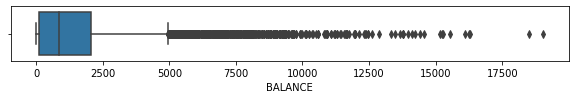

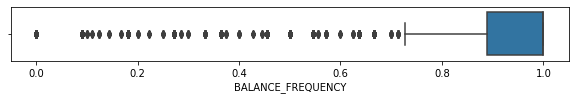

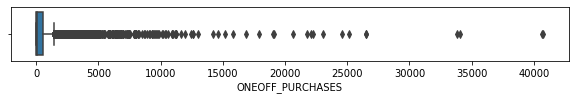

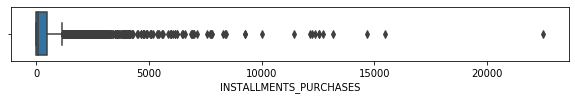

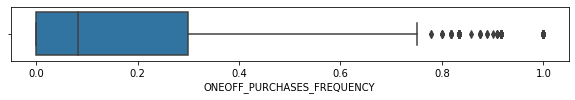

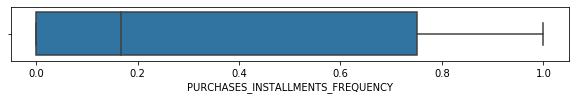

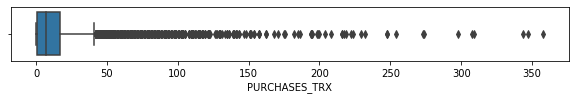

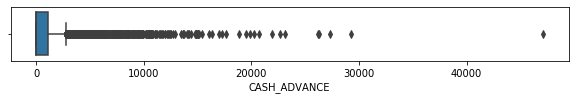

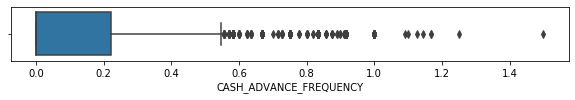

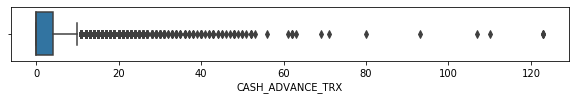

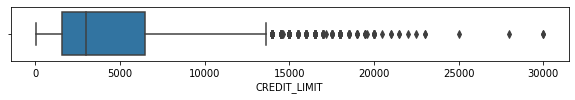

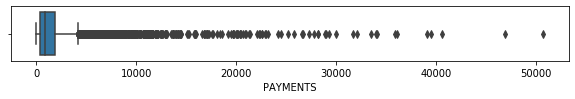

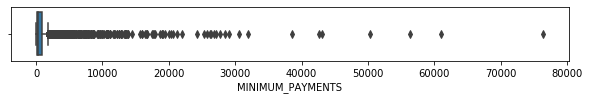

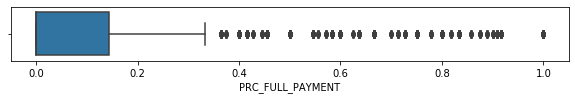

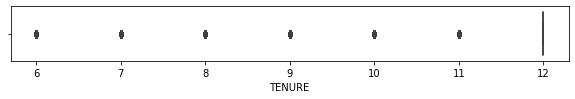

In [101]:
for i, col in enumerate(cols):
    plt.figure(i)
    plt.figure(figsize=(10,1))
    ax = sns.boxplot(x=df[col],orient="h")

Plotting the bar charts of each column confirms that the columns ONEOFF_PURCHASES, INSTALLMENTS_PURCHASES and MINIMUM_PAYMENTS have very skewed distributions.<br>
The bar chart of TENURE shows that it has only 6 values and is like a categorical variable. Moreover, most customers have a tenure of 12 months.

<h3>1.5 Fill Null Values</h3><br>
<Ul>
    <li>Since the column CREDIT_LIMIT has only one null value, filling it with the mean value of CREDIT_LIMIT will not affect this column much</li>
    <li>Similarly, fill the column MINIMUM_PAYMENTS with the mean value of MINIMUM_PAYMENTS.</li>
</Ul>

In [102]:
df_filled = df.copy()
df_filled.CREDIT_LIMIT = df_filled.CREDIT_LIMIT.fillna(value=df.CREDIT_LIMIT.mean())
df_filled.MINIMUM_PAYMENTS = df_filled.MINIMUM_PAYMENTS.fillna(value=df.MINIMUM_PAYMENTS.mean())

<br>
<br>
<h2>Part2. Preparation for K-Means Cluster Analysis</h2>

<br>
<h3>2.1 Check Correlation of the Columns</h3><br>

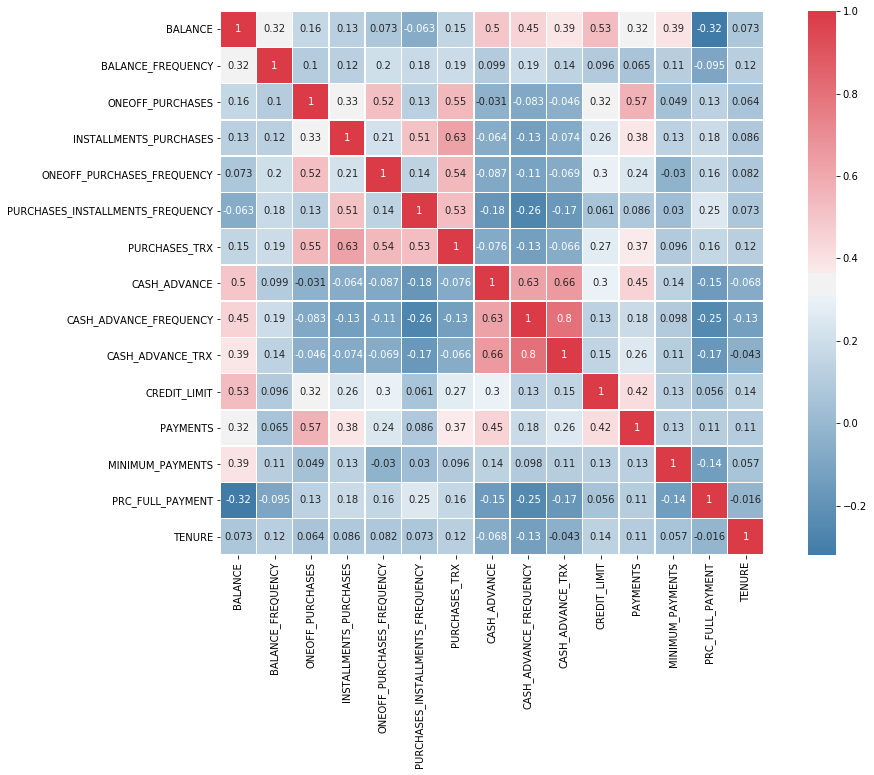

In [103]:
cmap = sns.diverging_palette(600, 10, as_cmap=True)
plt.figure(figsize=(16,10))
sns.heatmap(df_filled.corr(), cmap=cmap, square=True, linewidths=0.5, annot=True)

The columns INSTALLMENTS_PURCHASES and PURCHASES_TRX have the highest correlation. However, this might be a false correlationas the amount of purchase is not necessarily related to the number of purchases.<br>
However, CASH_ADVANCE_TRX has a high correlation with CASH_ADVANCE_FREQUENCY. One of them can be dropped.<br>
Here, CASH_ADVANCE_TRX is dropped since CASH_ADVANCE_FREQUENCY is an already normalized column.

In [104]:
cols = cols.remove('CASH_ADVANCE_TRX')
df_filled = df_filled.drop('CASH_ADVANCE_TRX',axis=1)

<br>
<h3>2.2 Trial 1: K-Means Cluster Analysis without Normalizing</h3><br>

this can be deleted

1 or 2 outliers: drop
more outliers: normalize

<h4>Minimize Cluster Inertia</h4>

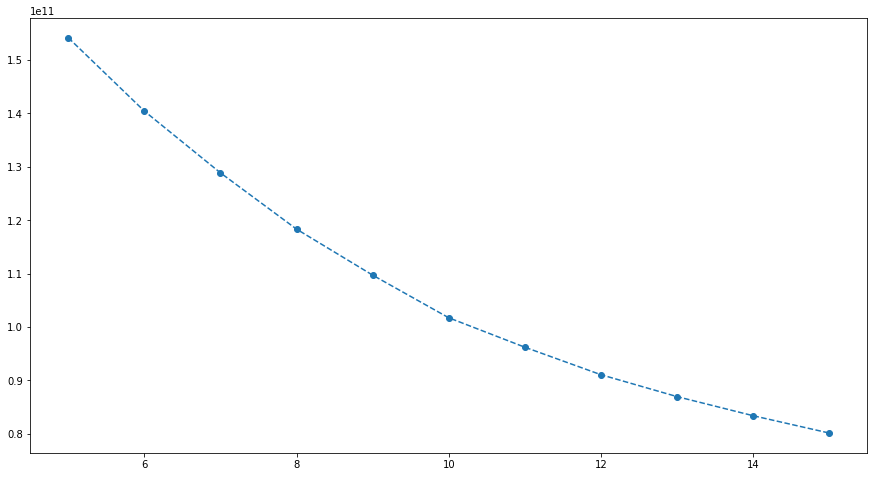

In [105]:
kmeans_inertia = []
for i in range(5,16):
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(df_filled)
    kmeans_inertia.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(5,16), kmeans_inertia, marker='o', linestyle='--')

10 clusters seems to be a good number for the unnormalized dataset.

<h4>K-Means Cluster Analysis</h4>

In [150]:
kmeans = KMeans(n_clusters=10,random_state=50)
kmeans.fit(df_filled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

<h4>Apply the Predicted Labels from K-Means</h4>

In [151]:
df_filled['Segment'] = kmeans.predict(df_filled)

<h4>Calculate the Mean of Each Column for Each Segment</h4>

In [157]:
kmeans_mean = df_filled.pivot_table(index='Segment',values=cols,aggfunc='mean').round(2).T
kmeans_count = df_filled.pivot_table(index='Segment',values='BALANCE',aggfunc='count').round(2).T.rename({'BALANCE':'COUNT'})
df_kmeans = kmeans_mean.append(kmeans_count).round(2)
df_kmeans
df_kmeans.style\
    .highlight_max(axis=1,color='#b5f5bf')\
    .highlight_min(axis=1,color='#f5beb5')\
    .set_precision(2)

Segment,0,1,2,3,4,5,6,7,8,9
BALANCE,2082.62,1546.32,5241.89,760.41,8360.92,5989.39,6674.08,3924.89,3308.57,807.63
BALANCE_FREQUENCY,0.92,0.88,0.89,0.85,0.99,0.96,1.00,0.97,0.99,0.87
CASH_ADVANCE,1504.68,401.46,11292.90,431.30,3851.40,1567.81,1008.55,3094.77,874.25,188.58
CASH_ADVANCE_FREQUENCY,0.15,0.06,0.51,0.11,0.35,0.07,0.06,0.35,0.11,0.05
CREDIT_LIMIT,7168.84,12470.61,10621.03,2048.54,12370.63,16460.00,6457.14,6085.52,3504.79,6264.28
INSTALLMENTS_PURCHASES,1368.45,697.98,679.49,257.78,702.44,5064.02,1714.50,238.44,772.49,520.66
MINIMUM_PAYMENTS,917.75,502.41,2205.37,492.94,2865.17,3327.14,52620.43,1447.89,15746.50,343.41
ONEOFF_PURCHASES,3121.29,1183.57,761.07,240.74,1055.68,20749.78,0.00,332.06,151.03,691.81
ONEOFF_PURCHASES_FREQUENCY,0.52,0.42,0.19,0.13,0.26,0.80,0.00,0.15,0.04,0.32
PAYMENTS,7464.59,2054.32,15128.66,847.55,2998.30,28721.46,2169.65,1979.25,1326.34,1350.61


<h4>Customer Segments:</h4>
<ol>
    <li><b>Segment 0:</b> Frequent users</li>
        <ul>
            <li>High balance frequency and purchase frequency</li>
            <li>Payments higher than minimum payments</li>
            <li>These users are able to pay their bill (not necessarily on time)</li>
            <li>Use discounts and campaigns to encourage these users to use their cards even more</li>
        </ul>
    <li><b>Segment 1:</b> Similar to Segment 0</li>
        <ul>
            <li>These users are able to pay their bill (not necessarily on time)</li>
            <li>Use discounts and campaigns to encourage these users to use their cards even more</li>
        </ul>
    <li><b>Segment 2:</b> Cash Users</li>
        <ul>
            <li>Highest cash advance amount and high payment amount</li>
            <li>Use memberships or discounts to keep these customers since they spend a lot.</li>
        </ul>
    <li><b>Segment 3:</b> Unfrequent Users</li>
        <ul>
            <li>Small balance amount, lowest balance frequency</li>
            <li>Start more campaigns to attract these users.</li>
        </ul>
    <li><b>Segment 4:</b> Overdrafters</li>
        <ul>
            <li>Frequent balance frequency, few months with full payment</li>
            <li>Payment amount slightly larger than minimum payment</li>
            <li>These customers frequently pay the minimum payment so that they can continue to use this credit card.</li>
            <li>Keep these customers (campaign/discount on interest of due payments) since they will pay the interests.</li>
        </ul>
    <li><b>Segment 5:</b> Large Spender</li>
        <ul>
            <li>High credit limit</li>
            <li>High purchase amount, frequency of both types</li>
            <li>Use memberships or discounts to keep these customers since they spend a lot.</li>
        </ul>
    <li><b>Segment 6:</b> Large Installment Purchases</li>
        <ul>
            <li>Zero one off purchase frequency and amount</li>
            <li>All installment purchases</li>
            <li>High purchase frequency</li>
            <li>No month with full payment</li>
            <li>High minimum payments but low payments</li>
            <li>Might be unable to pay their bill</li>
            <li>Warning should be given to these customers.</li>
        </ul>
    <li><b>Segment 7:</b> Similar to Segment 4</li>
        <ul>
            <li>These customers frequently pay the minimum payment so that they can continue to use this credit card.</li>
            <li>Keep these customers (campaign/discount on interest of due payments) since they will pay the interests.</li>
        </ul>
    <li><b>Segment 8:</b> Similar to Segment 6</li>
        <ul>
            <li>High minimum payments but low payments</li>
            <li>Warning should be given to these customers.</li>
        </ul>
    <li><b>Segment 9:</b> Careful Spenders</li>
        <ul>
            <li>Small balances and purchase amounts</li>
            <li>Lowest minimum payment amount</li>
            <li>These customers are very careful with their purchases so that they don't by anything out of their purchasing ability</li>
            <li>Provide discounts/campaigns to encourage these users to spend more without having to worry about paying the interest for overdue payments.</li>
        </ul>
</ol>
<br>
If the dataset is not normalized, there are many segments that are similar to each other. If the k-means cluster analysis is to be run again on this dataset, the size of the cluster should decrease to 7.

<br>
<h3>2.3 Trial 1: K-Means Cluster Analysis with Normalizing</h3><br>


<h4>Use the scaler to normalize each column of this dataset</h4>

In [158]:
scaler = StandardScaler()
df_filled_norm = pd.DataFrame(scaler.fit_transform(df_filled))
df_filled_norm.columns = df_filled.columns
df_filled_norm.head()

,BALANCE,BALANCE_FREQUENCY,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CASH_ADVANCE,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Segment
0,-0.731989,-0.249434,-0.356934,-0.349079,-0.678661,-0.707313,-0.511333,-0.466786,-0.675349,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,-0.499193
1,0.786961,0.134325,-0.356934,-0.454576,-0.678661,-0.916995,-0.591796,2.605605,0.573963,0.688639,0.818642,8.931021e-02,0.234227,0.36068,0.993923
2,0.447135,0.518084,0.108889,-0.454576,2.673451,-0.916995,-0.109020,-0.466786,-0.675349,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,1.740481
3,0.049099,-1.016953,0.546189,-0.454576,-0.399319,-0.916995,-0.551565,-0.368653,-0.258913,0.826062,-0.598688,-5.366135e-16,-0.525551,0.36068,1.740481
4,-0.358775,0.518084,-0.347294,-0.454576,-0.399319,-0.916995,-0.551565,-0.466786,-0.675349,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,-0.499193


<h4>Minimize Cluster Inertia</h4>

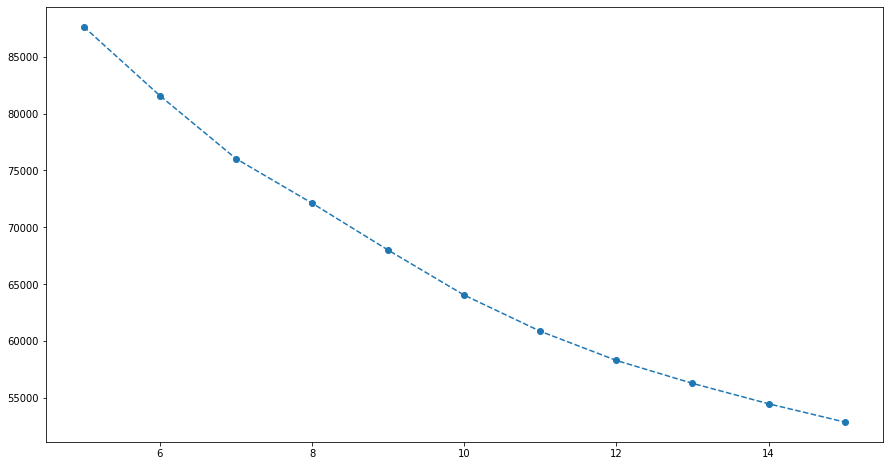

In [123]:
kmeans_inertia = []
for i in range(5,16):
    kmeans = KMeans(n_clusters=i,random_state=50)
    kmeans.fit(df_filled_norm)
    kmeans_inertia.append(kmeans.inertia_)
plt.figure(figsize=(15,8))
plt.plot(range(5,16), kmeans_inertia, marker='o', linestyle='--')

7 clusters seems to be a good number for the unnormalized dataset.

<h4>Minimize Cluster Inertia</h4>

In [162]:
kmeans = KMeans(n_clusters=7,random_state=50)
kmeans.fit(df_filled_norm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

<h4>Apply the Predicted Labels from K-Means</h4>

In [163]:
df_filled_copy = df_filled.copy()
df_filled_copy['Segment'] = kmeans.predict(df_filled_norm)

<h4>Calculate the Mean of Each Column for Each Segment</h4>

In [165]:
kmeans_mean = df_filled_copy.pivot_table(index='Segment',values=cols,aggfunc='mean').round(2).T
kmeans_count = df_filled_copy.pivot_table(index='Segment',values='BALANCE',aggfunc='count').round(2).T.rename({'BALANCE':'COUNT'})
df_kmeans = kmeans_mean.append(kmeans_count).round(2)
df_kmeans
df_kmeans.style\
    .highlight_max(axis=1,color='#b5f5bf')\
    .highlight_min(axis=1,color='#f5beb5')\
    .set_precision(2)

Segment,0,1,2,3,4,5,6
BALANCE,107.81,858.06,1446.45,1514.15,715.90,5323.34,4678.02
BALANCE_FREQUENCY,0.37,0.80,0.97,0.98,0.96,0.97,0.98
CASH_ADVANCE,312.79,1102.31,721.37,279.23,160.08,4894.08,953.58
CASH_ADVANCE_FREQUENCY,0.03,0.20,0.16,0.05,0.03,0.45,0.09
CREDIT_LIMIT,3884.69,2445.99,3208.48,6611.85,3489.84,8604.56,11392.73
INSTALLMENTS_PURCHASES,139.93,155.60,59.48,707.07,790.21,246.27,4126.62
MINIMUM_PAYMENTS,261.89,385.39,714.77,571.96,710.00,2627.60,3165.99
ONEOFF_PURCHASES,202.68,248.64,224.36,1962.34,199.02,358.66,7185.28
ONEOFF_PURCHASES_FREQUENCY,0.07,0.12,0.11,0.78,0.08,0.14,0.72
PAYMENTS,1157.08,614.30,988.51,2504.88,1124.71,3993.39,11364.72


<h4>Customer Segments:</h4>
<ol>
    <li><b>Segment 0:</b> Unfrequent Users</li>
        <ul>
            <li>Lowest balance amount, lowest balance frequency</li>
            <li>Start more campaigns to attract these users.</li>
        </ul>
    <li><b>Segment 1:</b> Credit Builders</li>
        <ul>
            <li>Lowest tenure and lowest credit limit shows that these are new customers</li>
            <li>High balance frequency</li>
            <li>Lowest payments. However, payments are higher than minimum payments</li>
            <li>These users are able to pay their bill (not necessarily on time)</li>
            <li>These new customers might be trying to build their credit by making small purchases.</li>
            <li>Use discounts and campaigns to encourage these users to use their cards even more</li>
        </ul>
    <li><b>Segment 2:</b> Credit Users</li>
        <ul>
            <li>High balance frequency, low purchance frequency</li>
            <li>Lowest percent of months with full payments</li>
            <li>These customers might only use credit cards when they need it.</li>
            <li>Use discounts and campaigns to encourage these users to use their cards more and charge for overdue payments</li>
        </ul>
    <li><b>Segment 3:</b> Frequent Users</li>
        <ul>
            <li>Highest balance frequency and one off purchase frequency</li>
            <li>Relatively high percentage of months with full payment</li>
            <li>These customers are able to pay their bills.</li>
            <li>Use discounts and campaigns to encourage these users to use their cards more</li>
        </ul>
    <li><b>Segment 4:</b> Careful Spenders</li>
        <ul>
            <li>Second highest installment purchase frequency</li>
            <li>Purchases in small amount</li>
            <li>Relatively high percentage of months with full payment</li>
            <li>These customers are very careful with their purchases so that they don't by anything out of their purchasing ability</li>
            <li>Provide discounts/campaigns to encourage these users to spend more without having to worry about paying the interest for overdue payments.</li>
        </ul>
    <li><b>Segment 5:</b> Overdrafters</li>
        <ul>
            <li>Frequent balance frequency, few months with full payment</li>
            <li>Payment amount slightly larger than minimum payment</li>
            <li>These customers frequently pay the minimum payment so that they can continue to use this credit card.</li>
            <li>Keep these customers (campaign/discount on interest of due payments) since they will pay the interests.</li>
        </ul>
    <li><b>Segment 6:</b> Large Spender</li>
        <ul>
            <li>Highest credit limit</li>
            <li>Highest purchase amount, high frequency of both types</li>
            <li>Use memberships or discounts to keep these customers since they spend a lot and are able to pay their bills.</li>
        </ul>
</ol>
<br>
After normalizing, there are more sparation between each customer groups. This cluster analysis is better than the previous one.<br>
Most credit card users seem to only use the credit card when they cannot pay with debit or cash. There are also a group of of new customers who are trying to build their credit through small purchases. Moreover, there is also a group of unfrequent users who might be using other credit cards that could be good targets for campaigns.